This is what sift does
<SIFT 0000000011C8BF10>


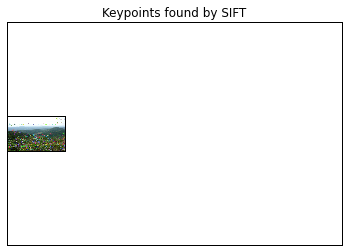

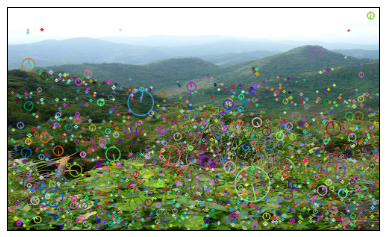

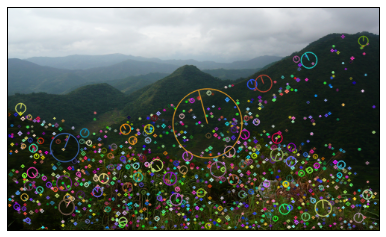

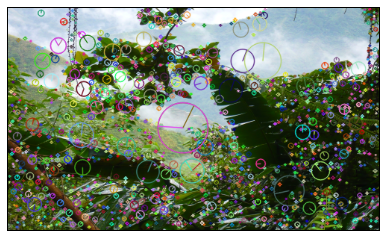

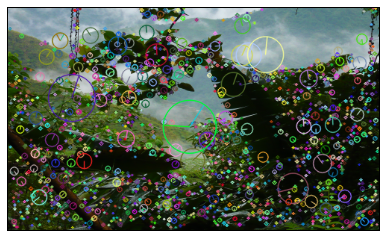

NameError: name 'points' is not defined

In [5]:
import cv2    
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

import os
def get_imlist(path):
    return [[os.path.join(path,f) for f in os.listdir(path) if (f.endswith('.jpg') or f.endswith('.png'))]]

def createVocabulary(image, ucmap):
    if len(image.shape)==3 :
        b,g,r = cv2.split(image)
        image = cv2.merge([r,g,b])
    imgplot=plt.imshow(image, ucmap)
    imgplot.axes.get_xaxis().set_visible(False)
    imgplot.axes.get_yaxis().set_visible(False)
    plt.rcParams['figure.figsize'] = 17, 4
filenames=get_imlist('C:/Anu')
filenames=np.array(filenames)

descriptor_mat=[]
sift=cv2.SIFT()
print "This is what sift does"
print sift
fig = plt.figure()
plt.title('Keypoints found by SIFT')
plt.xticks(())
plt.yticks(())
#for image_no in xrange(5):
img=cv2.imread(filenames[0][image_no])
img=cv2.resize(img, (500, 300), interpolation=cv2.INTER_AREA)
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray=cv2.equalizeHist(gray)
kp, des=sift.detectAndCompute(gray,None)
descriptor_mat.append(des)
img=cv2.drawKeypoints(img, kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
fig.add_subplot(1, 5, image_no+1)
createVocabulary(img, None)
plt.show()
    
class Point:
    def __init__(self, coords):
        self.coords = coords
        self.n = len(coords)
    def __repr__(self):
        return str(self.coords)
        
def getDistance(a, b):    
    ret = reduce(lambda x,y: x + pow((a.coords[y]-b.coords[y]), 2),range(a.n),0.0)
    return math.sqrt(ret)
        
        
class Cluster:
    def __init__(self, points):
       
        self.points = points
        
        print(points)
        print(points[0][0])
        self.n = points[0][0][0].n
        
        for p in points:
            if p.n != self.n: raise Exception("incorrect dimension")
            
        self.centroid = self.calculateCentroid()
    
    def update(self, points):
        old_centroid = self.centroid
        self.points = points
        self.centroid = self.calculateCentroid()
    
    def calculateCentroid(self):
        numPoints = len(self.points)
        coords = [p.coords for p in self.points]
        unzipped = zip(*coords)
        centroid_coords = [math.fsum(dList)/numPoints for dList in unzipped]
        
        return Point(centroid_coords)

def makeDataPoint(i):
    p = Point(i)
    return p

def myKMeans(k,points):
    random.seed(11112014)
    initial = random.sample(points, k)
    clus = [Cluster([p]) for p in initial]
    loopCounter = 0
    lists = [ [] for c in clusters]
    clusterCount = len(clusters)
    loopCounter += 1
    for p in points:
        smallest_distance = getDistance(p, clusters[0].centroid)    
        clusterIndex = 0    
        for i in range(clusterCount - 1):
            distance = getDistance(p, clusters[i+1].centroid)
            if distance < smallest_distance:
                smallest_distance = distance
                clusterIndex = i+1            
        lists[clusterIndex].append(p)
        biggest_shift = 0.0
    for i in range(clusterCount):
        clusters[i].update(lists[i])   
    return clusters


def mykmeansplusplus (points,k,itr):
    data_x_shape = points.shape[0]
    index = np.random.randint(data_x_shape, size =1)
    initial_clust_center = points[index]
    initialCentroid = points[index]
    weight = np.zeros((points.shape[0]))
    index = np.zeros((points.shape[0]))

    for i in range(0,(k - 1)):
        Y= cdist(points, initialCentroid, metric='euclidean', p=2, V=None, VI=None, w=None)
        min_dist = np.amin(Y, axis=1) 
        min_center = np.argmin(Y, axis=1)
        min_dist_sum = np.sum(min_dist, axis=0)
        min_squared_dist_sum = np.sum(min_dist**2, axis=0)
        min_dist = min_dist**2
        min_dist_prob = min_dist / min_squared_dist_sum
        next_index = np.random.choice(points.shape[0],1,p=min_dist_prob)
        initial_clust_center = np.concatenate((initial_clust_center,points[next_index]),axis=0)
        
    initial_class = np.zeros((points.shape[0]))
    for j in range(0,itr):
        Z=cdist(points, initial_clust_center, metric='euclidean', p=2, V=None, VI=None, w=None)
        target_dist = np.amin(Z, axis=1)  
        target_class = np.argmin(Z, axis=1)
        for i in range(0,k-1):
            values = points[target_class == i]
            #print(values)
            #print(i)
            initialCentroid[i,:] = np.mean(values, axis = 0)
        if np.array_equal(initial_class,target_class):
            break
        else:
            initial_class = target_class

    return initial_clust_center, target_class  

#cluster_centers=myKMeans(5, descriptor_mat)


initial_clust_center, target_class  = mykmeansplusplus (points,2,100)

print('hello')

def getbof():
    training=[]
    filenames=get_imlist('F:\jpg')
    filenames=np.array(filenames)
    descr=[]
    for image_name in filenames[0]:
        img=cv2.imread(image_name)
        gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        gray=cv2.resize(gray, (300, 200), interpolation=cv2.INTER_AREA)
        gray=cv2.equalizeHist(gray)
        _, des=sift.detectAndCompute(gray, None)
        descr.append(des)
    training.append(descr)
    return training


In [ ]:
def createVocabulary(data,k,itr):
    clust_centers, labels = mykmeansplusplus(data,k,itr)
    f = open("C:/Index-Project/ankur.txt", "w")
    f.write(cPickle.dumps(index))
    f.close()
    return clust_centers

def mykmeansplusplus (points,k,itr):
    data_x_shape = points.shape[0]
    index = np.random.randint(data_x_shape, size =1)
    initial_clust_center = points[index]
    initialCentroid = points[index]
    weight = np.zeros((points.shape[0]))
    index = np.zeros((points.shape[0]))

    for i in range(0,(k - 1)):
        Y= cdist(points, initialCentroid, metric='euclidean', p=2, V=None, VI=None, w=None)
        min_dist = np.amin(Y, axis=1) 
        min_center = np.argmin(Y, axis=1)
        min_dist_sum = np.sum(min_dist, axis=0)
        min_squared_dist_sum = np.sum(min_dist**2, axis=0)
        min_dist = min_dist**2
        min_dist_prob = min_dist / min_squared_dist_sum
        next_index = np.random.choice(points.shape[0],1,p=min_dist_prob)
        initial_clust_center = np.concatenate((initial_clust_center,points[next_index]),axis=0)
        
    initial_class = np.zeros((points.shape[0]))
    for j in range(0,itr):
        Z=cdist(points, initial_clust_center, metric='euclidean', p=2, V=None, VI=None, w=None)
        target_dist = np.amin(Z, axis=1)  
        target_class = np.argmin(Z, axis=1)
        for i in range(0,k-1):
            values = points[target_class == i]
            #print(values)
            #print(i)
            initialCentroid[i,:] = np.mean(values, axis = 0)
        if np.array_equal(initial_class,target_class):
            break
        else:
            initial_class = target_class

    return initial_clust_center, target_class  

# initialize our image descriptor -- a 3D RGB histogram with
# 8 bins per channel
desc = RGBHistogram([8, 8, 8])
feature_size = math.pow(8, 3)
def read():
    path = 'C:/Anu/'
    imlist = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]
    featuresCollect = np.zeros([len(imlist), feature_size])
    i=0
    # use glob to grab the image paths and loop over them
    for imagePath in glob.glob("C:/Anu" + "/*.jpg"):
        # extract our unique image ID (i.e. the filename)
        k = imagePath[imagePath.rfind("/") + 1:]
        # load the image, describe it using our RGB histogram
        # descriptor, and update the index
        image = cv2.imread(imagePath)
        features = desc.describe(image)
        preprocessing.scale(features,axis = 0, with_mean=True, with_std=False)
        featuresCollect[i] = features 
        i=i+1
        index[k] = features
    clusters = createVocabulary(featuresCollect,2,100)

    

    

print "Time taken by read"
t0 = time.time()
#read()
print (time.time()-t0)
    
print "Done with Vocab"
#print vocab    

def myvlad(local_descriptors, centroids):
    V = np.zeros([centroids.shape[0],local_descriptors.shape[1]])
    distances = pairwise_distances(local_descriptors, centroids, metric='euclidean')
    clusters = np.argmin(distances,axis=1)
    for iter, center in enumerate(centroids):
        points_belonging_to_cluster = local_descriptors[clusters == iter]
        V[iter] = np.sum(points_belonging_to_cluster - center, axis=0)
        
    return V

print "Now Make VLAD"
#vlad = my_vlad(featuresCollect,vocab)
#print vlad
print "After VLAD"

print "Applying ANN Now"

#approx_neighbors = lshf.kneighbors(vlad,4,return_distance=True)
#print approx_neighbors
    
# we are now done indexing our image -- now we can write our
# index to disk



# import the necessary packages
import numpy as np
 
class VLAD:
	def __init__(self, index):
		# store our index of images
		self.index = index
 
	def my_vlad(self, queryFeatures):
		# initialize our dictionary of results
		results = {}
 
		# loop over the index
		for (k, features) in self.index.items():
			# compute the chi-squared distance between the features
			# in our index and our query features -- using the
			# chi-squared distance which is normally used in the
			# computer vision field to compare histograms
			d = self.chi2_distance(features, queryFeatures)
 
			# now that we have the distance between the two feature
			# vectors, we can udpate the results dictionary -- the
			# key is the current image ID in the index and the
			# value is the distance we just computed, representing
			# how 'similar' the image in the index is to our query
			results[k] = d
 
		# sort our results, so that the smaller distances (i.e. the
		# more relevant images are at the front of the list)
		results = sorted([(v, k) for (k, v) in results.items()])
 
		# return our results
		return results
 
	def chi2_distance(self, histA, histB, eps = 1e-10):
		# compute the chi-squared distance
		d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps)
			for (a, b) in zip(histA, histB)])
 
		# return the chi-squared distance
		return d
    

# import the necessary packages
#from pyimagesearch.searcher import Searcher
import numpy as np
import argparse
import cPickle
import cv2

# load the index and initialize our searcher
index = cPickle.loads(open("C:/Index-Project/ankur.txt").read())
searcher = VLAD(index)


# loop over images in the index -- we will use each one as
# a query image
cv2.startWindowThread()
#for (query, queryFeatures) in index.items():
# perform the search using the current query
print "Time taken by vlad"
t0 = time.time()

query="130500.jpg"
path ="C:/" + "/Anu/%s" % (query)
#print path
image = cv2.imread(path)
#print image
queryFeatures = desc.describe(image)
#print(queryFeatures)
results = searcher.my_vlad(queryFeatures)
#print results
print (time.time()-t0)
 
# load the query image and display itqueryFeatures
#print query
#print queryFeatures

#print path
queryImage = cv2.imread(path)
#print queryImage
#print queryImage
cv2.imshow('Query', queryImage)
cv2.waitKey(0) & 0xFF
#print "query: %s" % (query)
 
# initialize the two montages to display our results --
# we have a total of 25 images in the index, but let's only
# display the top 10 results; 5 images per montage, with
# images that are 400x166 pixels
montageA = np.zeros((3264*5,2448,3), dtype = "uint8")
#montageB = np.zeros((3264*5,2448,3), dtype = "uint8")

# loop over the top ten results
for j in xrange(0, 5):
	# grab the result (we are using row-major order) and
	# load the result image
	(score, imageName) = results[j]
	#print imageName
	path = "C:/" + "/%s" % (imageName)
	print path
	result = cv2.imread(path)
	cv2.imshow("Results 1-5", result)
	cv2.waitKey(0) & 0xFF

cv2.waitKey(0) & 0xFF
cv2.destroyAllWindows()



#filenames=get_imlist('C:/Anu')
#filenames=np.array(filenames)

descriptor_mat=[]
sift=cv2.SIFT()
#print "This is what sift does"
#print sift
#fig = plt.figure()
#plt.title('Keypoints found by SIFT')
#plt.xticks(())
#plt.yticks(())
#for image_no in xrange(5):
img=cv2.imread(filenames[0][image_no])
img=cv2.resize(img, (500, 300), interpolation=cv2.INTER_AREA)
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray=cv2.equalizeHist(gray)
kp, des=sift.detectAndCompute(gray,None)
descriptor_mat.append(des)
img=cv2.drawKeypoints(img, kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
fig.add_subplot(1, 5, image_no+1)
createVocabulary(img, None)
plt.show()